# IS362 Final Project

Since I spend a lot of time being on road, driving in different states, I noticed that drivers from different states drive differently. So, my topic will be analysis of different aspects of bad driving in different states. I found very interesting website of national highway traffic safety administration (nhtsa.gov) that provides a lot of different traffic data from all our states. I will find the way to acquire necessary information, I'll clean it up, process it, analyze it, and visualize it.   

In [171]:
import pandas as pd
import numpy as np
%matplotlib inline 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

I found nhtsa.gov website that provides all traffic data for United States. After the short reserch on the website I found their raw Data from FTP Site. Then I downloaded FARS2017 file to my github and then uploaded accident.csv into a pandas dataframe

In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/VictorSPS/IS362_Final/master/FARS2017NationalCSV/accident.csv')

In [167]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34247 entries, 0 to 34246
Data columns (total 52 columns):
STATE         34247 non-null int64
ST_CASE       34247 non-null int64
VE_TOTAL      34247 non-null int64
VE_FORMS      34247 non-null int64
PVH_INVL      34247 non-null int64
PEDS          34247 non-null int64
PERNOTMVIT    34247 non-null int64
PERMVIT       34247 non-null int64
PERSONS       34247 non-null int64
COUNTY        34247 non-null int64
CITY          34247 non-null int64
DAY           34247 non-null int64
MONTH         34247 non-null int64
YEAR          34247 non-null int64
DAY_WEEK      34247 non-null int64
HOUR          34247 non-null int64
MINUTE        34247 non-null int64
NHS           34247 non-null int64
RUR_URB       34247 non-null int64
FUNC_SYS      34247 non-null int64
RD_OWNER      34247 non-null int64
ROUTE         34247 non-null int64
TWAY_ID       34247 non-null object
TWAY_ID2      9145 non-null object
MILEPT        34247 non-null int64
LATITUDE      3

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,73,...,99,99,99,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,1,1,89,...,0,15,9,88,88,0,0,0,1,0
2,1,10003,3,3,0,0,0,3,3,101,...,99,99,99,88,88,0,0,0,1,0
3,1,10004,1,1,0,0,0,1,1,73,...,99,16,58,88,88,20,0,0,1,0
4,1,10005,1,1,0,0,0,2,2,13,...,17,20,31,21,11,0,0,0,1,0
5,1,10006,2,2,0,0,0,4,4,49,...,40,18,46,99,99,0,0,0,1,0
6,1,10007,2,2,0,0,0,2,2,73,...,99,99,99,88,88,0,0,0,1,0
7,1,10008,1,1,0,0,0,1,1,3,...,52,17,10,99,99,0,0,0,1,0
8,1,10009,1,1,0,0,0,1,1,87,...,99,14,40,88,88,0,0,0,1,0
9,1,10010,1,1,0,1,1,1,1,73,...,99,4,39,88,88,0,0,0,1,0


For better visual I replaced codes for states with state's names

In [168]:
state_codes = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona',  5: 'Arkansas', 6: 'California', 
8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida',
13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana',
19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota',  28: 'Mississippi', 
29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire',
34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota',
39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico',
44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 53: 'Washington',
54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

df['STATE'] = df['STATE'].replace(state_codes)

Now we can find the most deadly state according to fatal accidents data

In [169]:
print('Top 10 Deadliest States')
print(df.groupby('STATE')['FATALS'].sum().nlargest(10))

Top 10 Deadliest States
STATE
Texas             3722
California        3602
Florida           3112
Georgia           1540
North Carolina    1412
Ohio              1179
Pennsylvania      1137
Illinois          1097
Tennessee         1040
Michigan          1030
Name: FATALS, dtype: int64


I did the statistical analysis of fatal crashes and used matplotlib to built the graph of average fatal accedents by states

Mean or average of fatal accidents: 1.0842701550500773
Median of fatal crashes: 1.0
Standard deviation of fatal crashes: 0.34998587220569255


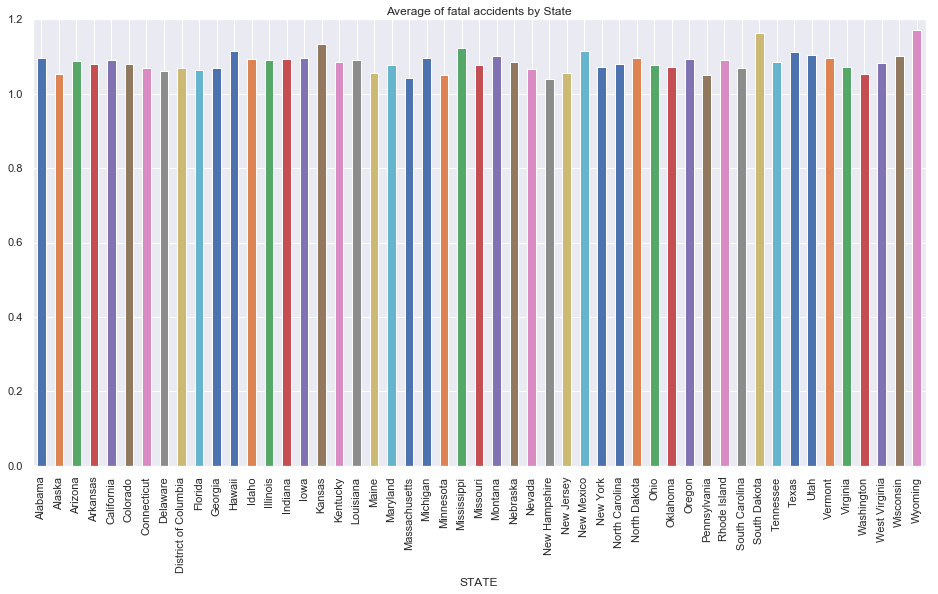

In [172]:
#Mean adds up the observed values and divide by the number of them
print('Mean or average of fatal accidents:', df['FATALS'].mean()) 
#The median is known as a measure of location; that is, it tells us where the data are
print('Median of fatal crashes:', df['FATALS'].median())
#Standard deviation is a summary measure of the differences of each observation from the mean
print('Standard deviation of fatal crashes:', df['FATALS'].std()) 
df.groupby('STATE')['FATALS'].mean().plot(kind='bar', figsize=(16,8), title='Average of fatal accidents by State')

The people behind CarInsuranceComparison.com compiled data from the U.S. Department of Transportation's National Highway Traffic Safety Administration to assess which states' drivers are really the worst. I was able to scrap and obtain these information then I downloaded file to my github and then uploaded it into a pandas dataframe

In [145]:
df2 = pd.read_csv('https://raw.githubusercontent.com/VictorSPS/IS362_Final/master/Worst%20Drivers%20By%20State.csv')

In [146]:
df2.head(51)

,State,Fatalities Rate per 100 Million Vehicle Miles Traveled,"Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)",Drunk Driving,Speeding,Careless Driving,Total Score,Rank
0,Alabama,15.0,14.0,18.0,29.0,26.0,102.0,12.0
1,Alaska,26.0,44.0,46.0,5.0,42.0,163.0,40.0
2,Arizona,10.0,7.0,47.0,17.0,3.0,84.0,6.0
3,Arkansas,8.0,8.0,31.0,50.0,19.0,116.0,20.0
4,California,40.0,15.0,33.0,23.0,9.0,120.0,22.0
5,Colorado,29.0,2.0,21.0,26.0,33.0,111.0,18.0
6,Connecticut,42.0,11.0,4.0,41.0,37.0,135.0,28.0
7,Delaware,24.0,25.0,28.0,14.0,2.0,93.0,9.0
8,District of Columbia,51.0,27.0,44.0,4.0,22.0,148.0,37.0
9,Florida,16.0,29.0,41.0,51.0,1.0,138.0,32.0


In [147]:
df2=df2.head(51)

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
State                                                                      51 non-null object
Fatalities Rate per 100 Million Vehicle Miles Traveled                     51 non-null float64
Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)    51 non-null float64
Drunk Driving                                                              51 non-null float64
Speeding                                                                   51 non-null float64
Careless Driving                                                           51 non-null float64
Total Score                                                                51 non-null float64
Rank                                                                       51 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


I tried to predict fatalities according to speeding, careless driving, and drunk driving
I used a machine learning technique which uses a random forest to make the predictions. 
Since the r-squared is very low prediction won't be very accurate

In [149]:
X = df2[['Speeding', 'Careless Driving', 'Drunk Driving']]
y = df2['Fatalities Rate per 100 Million Vehicle Miles Traveled']

X_train, X_test, y_train, y_test = train_test_split(X, y)

rfclf = RandomForestRegressor(n_estimators=100)

rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)

r2_score(y_test, y_pred)

-0.22046738822278655

Then I decided to build the stacked bar plot using matplotlib just to visualize the sum of speeding, fatalities, and drunk driving by state

In [150]:
df2.head()

,State,Fatalities Rate per 100 Million Vehicle Miles Traveled,"Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)",Drunk Driving,Speeding,Careless Driving,Total Score,Rank
0,Alabama,15.0,14.0,18.0,29.0,26.0,102.0,12.0
1,Alaska,26.0,44.0,46.0,5.0,42.0,163.0,40.0
2,Arizona,10.0,7.0,47.0,17.0,3.0,84.0,6.0
3,Arkansas,8.0,8.0,31.0,50.0,19.0,116.0,20.0
4,California,40.0,15.0,33.0,23.0,9.0,120.0,22.0


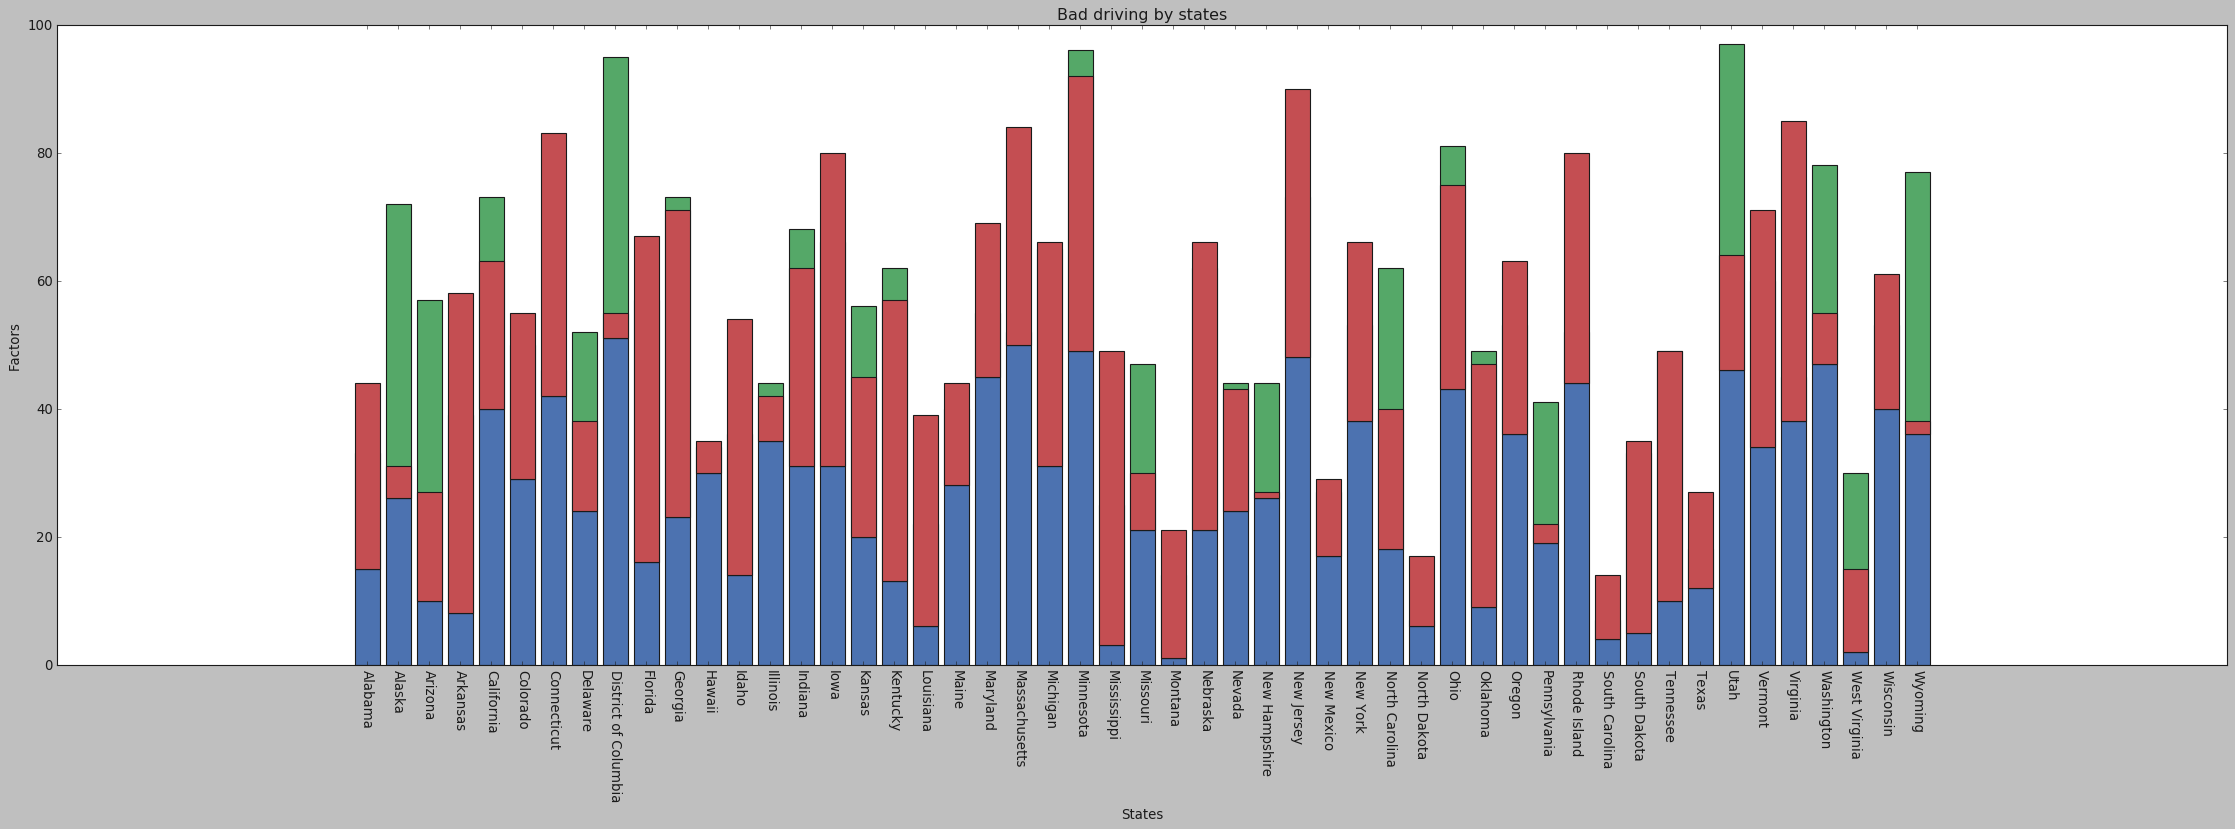

In [151]:
new_df=df2[:51][['State', 'Fatalities Rate per 100 Million Vehicle Miles Traveled', 'Drunk Driving', 'Speeding']]
states=new_df.iloc[:, 0]
barDeath=new_df.iloc[:,1]
barDrunk=new_df.iloc[:,2]
barSpeed=new_df.iloc[:,3]
indx=np.arange(len(new_df))
plt.figure(figsize=(35,10))
graphDeath=plt.bar(x=indx, height=barDeath, width=0.8)
graphDrunk=plt.bar(x=indx, height=barDrunk, width=0.8, bottom=barDeath)
graphSpeed=plt.bar(x=indx, height=barSpeed, width=0.8, bottom=barDeath)
plt.xlabel('States')
plt.ylabel('Factors')

plt.xticks(indx, states)
plt.xticks(rotation=-90)
plt.title('Bad driving by states')
plt.show()

10 States with the highest number of fatalities from car accidents:

In [173]:
print('The most deadliest states according to fatality rate')
print (df2.sort_values('Fatalities Rate per 100 Million Vehicle Miles Traveled', 
                ascending=False)['State'].head(10) )


The most deadliest states according to fatality rate
8     District of Columbia
21           Massachusetts
23               Minnesota
30              New Jersey
47              Washington
44                    Utah
20                Maryland
39            Rhode Island
35                    Ohio
6              Connecticut
Name: State, dtype: object


10 States with the highest number of traffic related cases

In [164]:

print('10 states with the highest number of traffic related cases  ')
print(df.groupby('STATE')['ST_CASE'].count().nlargest(10))

10 states with the highest number of traffic related cases  
STATE
Texas             3343
California        3304
Florida           2922
Georgia           1440
North Carolina    1306
Ohio              1094
Pennsylvania      1083
Illinois          1005
Tennessee          959
Michigan           939
Name: ST_CASE, dtype: int64


# Conclusion  

According to the data that I analyzed: Texas, California, Florida, Georgia, North Carolina, Ohio, Pennsylvania, and Illinois have the highest number of traffic related cases. But some of these states are the biggest ones in the country. And obviously, we will have more accidents in the biggest states. At the same time we also found out that District of Columbia, Massachusetts, Minnesota, New Jersey, and Washington are the most deadliest states according to fatality rate in car accidents. Accordingly, I woud say they are more dangerous to drive in.